In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [250]:
df_train = pd.read_csv("train.csv")
df_train.shape

(891, 12)

In [251]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

In [252]:
df_train["Name"] = df_train["Name"].apply(extract_title)

In [253]:
lb = LabelEncoder()
df_train["Name"] = lb.fit_transform(df_train["Name"])
df_train["Embarked"] = lb.fit_transform(df_train["Embarked"])

In [254]:
OHE = OneHotEncoder(drop = 'first')

In [255]:
array = OHE.fit_transform(df_train[["Sex"]]).toarray()
encoded_sex_df = pd.DataFrame(array, columns=OHE.get_feature_names_out(['Sex']))
df_train = pd.concat([df_train, encoded_sex_df], axis=1)

si = SimpleImputer(strategy = "mean")
df_train['Age'] = si.fit_transform(df_train[['Age']])
df_train.drop(["Sex", "Ticket", "Cabin"], axis=1, inplace=True)

In [321]:
sd = StandardScaler()
pf = PolynomialFeatures(degree = 2)

In [322]:
x = df_train.iloc[:, :-2]  
x['Sex_male'] = df_train.iloc[:, -1]
y = df_train["Survived"]

x = sd.fit_transform(x)
x = pf.fit_transform(x)


<Figure size 1000x500 with 0 Axes>

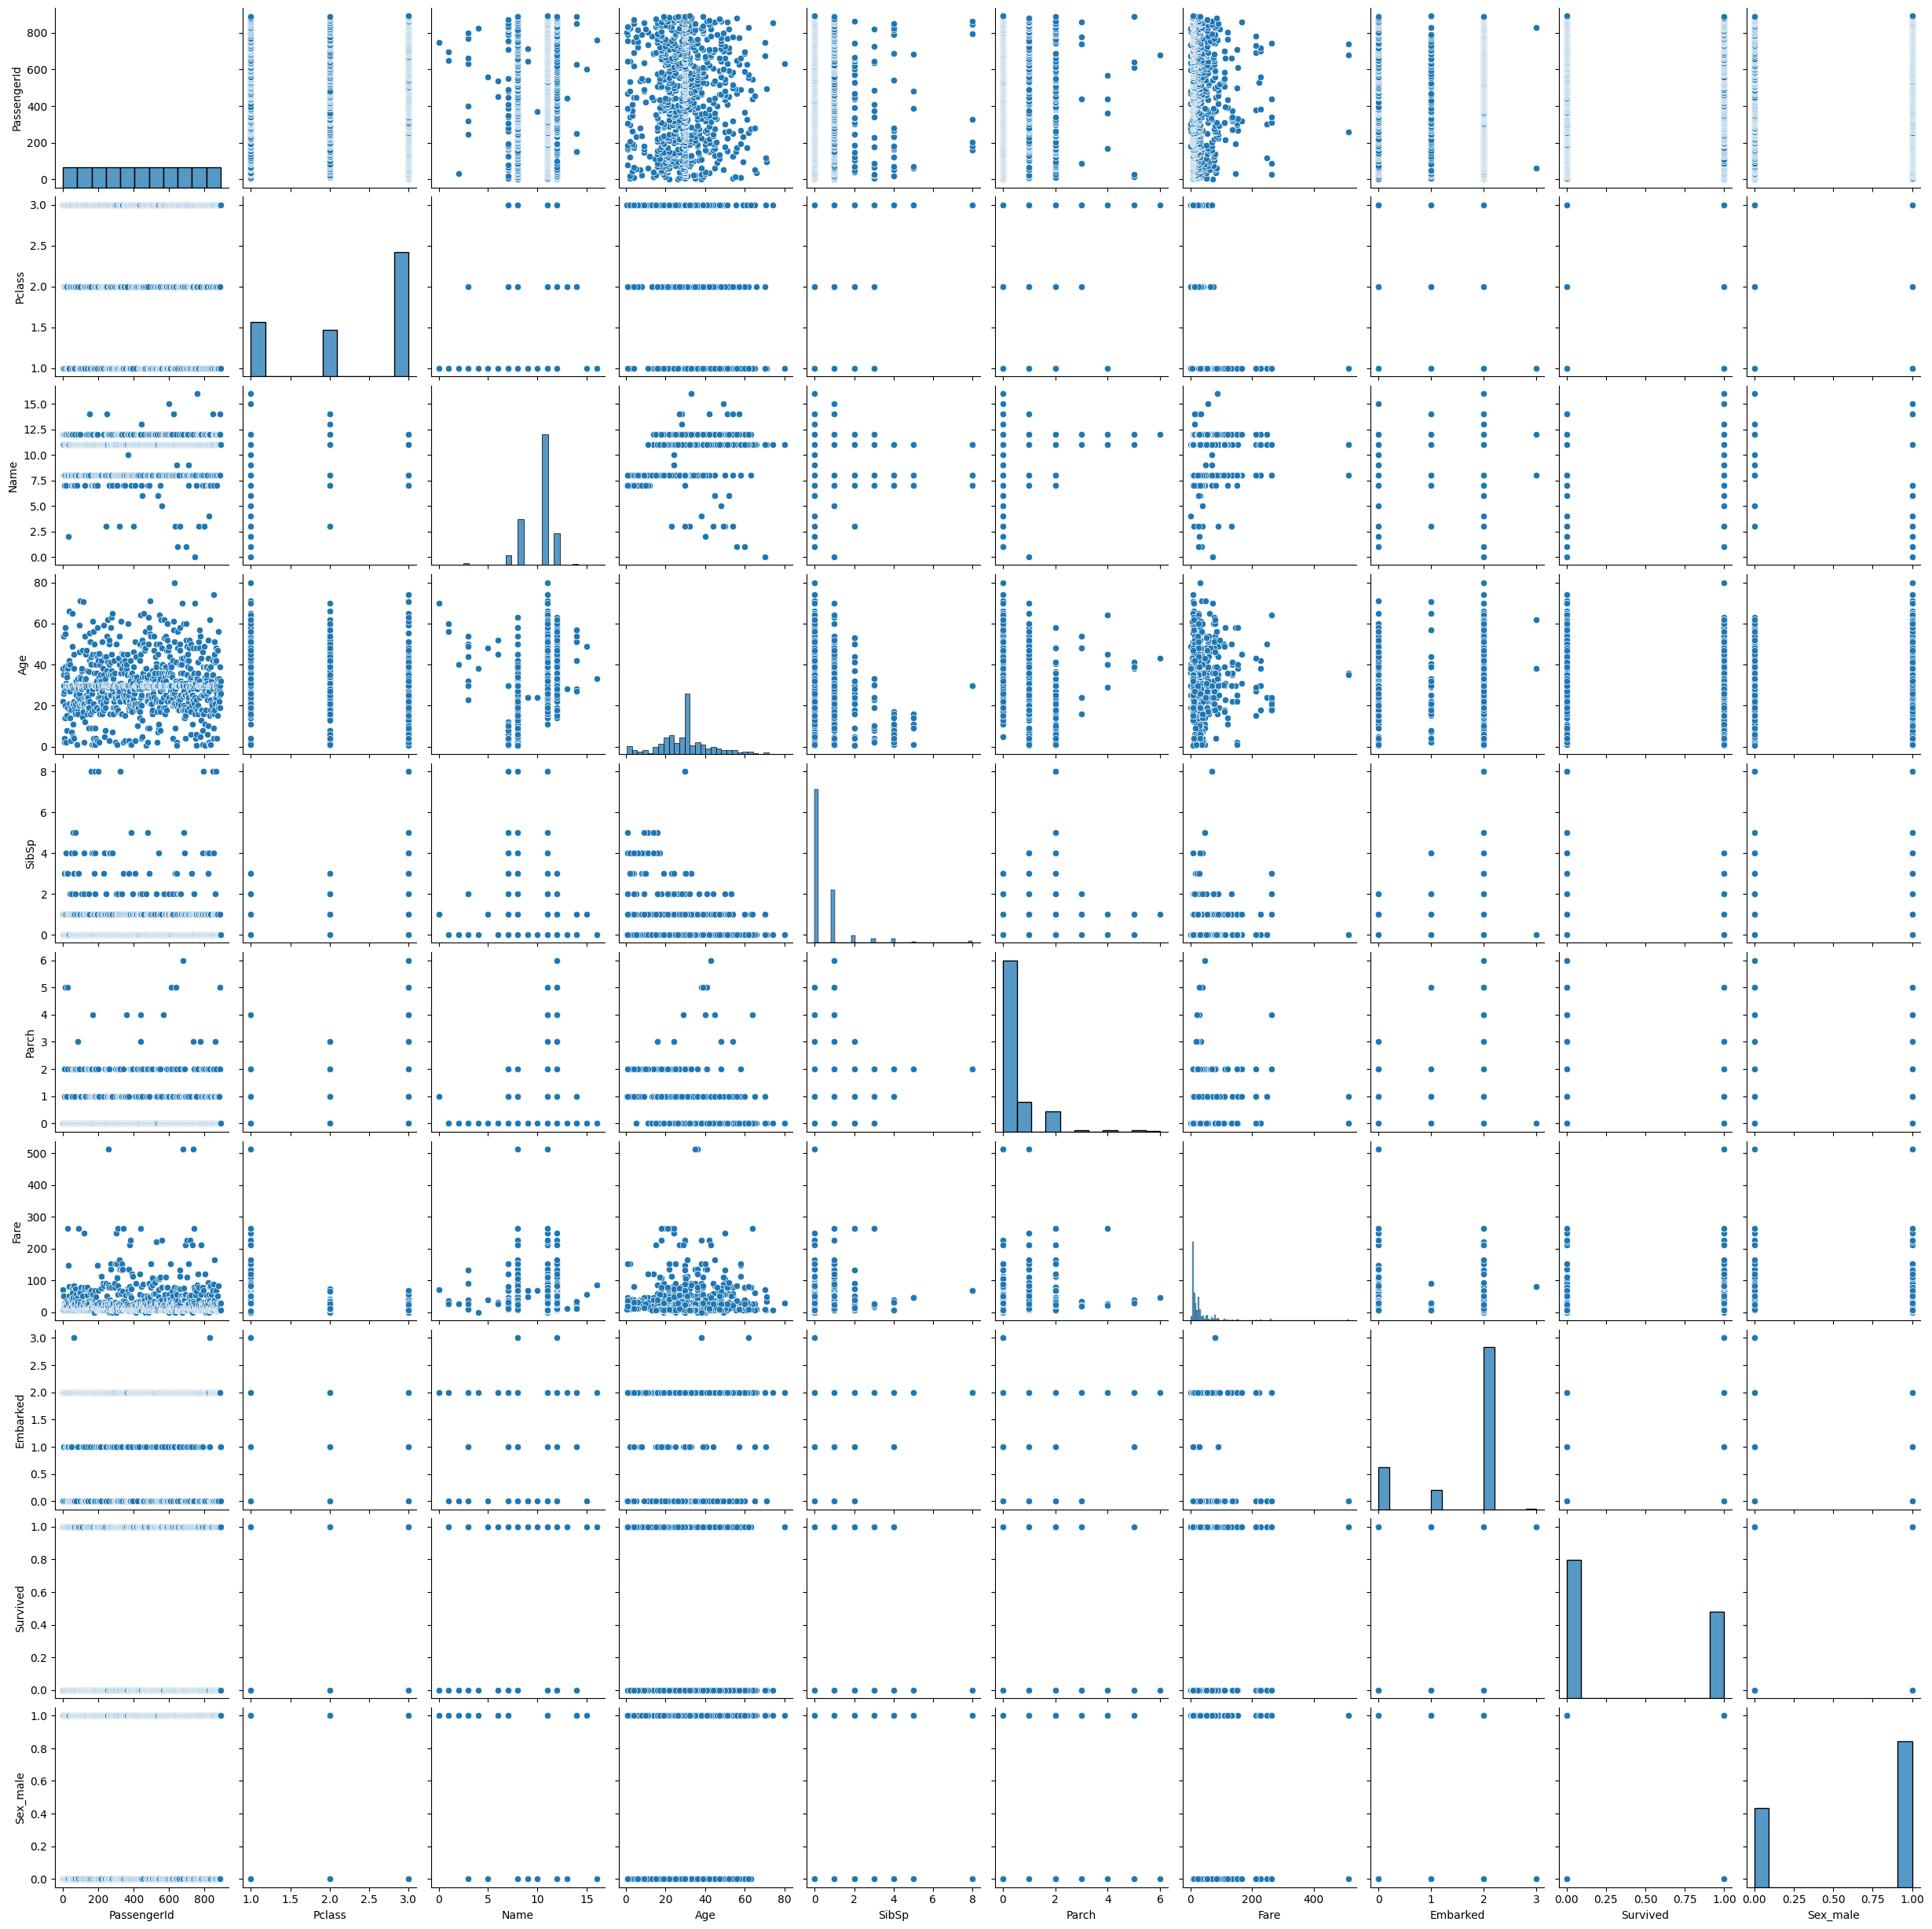

In [323]:
plt.figure(figsize = (10,5))
sns.pairplot(df_train)
plt.show()

In [324]:
x_train, x_tmp, y_train, y_tmp = train_test_split(x,y, test_size = 0.3, random_state = 10)
x_cv, x_test, y_cv, y_test = train_test_split(x_tmp, y_tmp, test_size = 0.5, random_state = 10)
x_train

array([[ 1.        , -1.70289278,  0.82737724, ...,  0.33769341,
         0.42868493,  0.54419411],
       [ 1.        ,  1.24412258, -1.56610693, ...,  0.33769341,
        -0.78774268,  1.83757962],
       [ 1.        , -0.4121156 , -1.56610693, ...,  0.33769341,
         0.42868493,  0.54419411],
       ...,
       [ 1.        ,  0.31880641, -1.56610693, ...,  0.33769341,
         0.42868493,  0.54419411],
       [ 1.        , -1.24412258,  0.82737724, ...,  3.75762864,
        -1.42999279,  0.54419411],
       [ 1.        , -0.69981895, -0.36936484, ...,  0.33769341,
         0.42868493,  0.54419411]])

In [325]:
lr = LogisticRegression(intercept_scaling=1, multi_class="auto", penalty="l1", solver="saga")

In [326]:
lr.fit(x_train, y_train )

C:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='auto', penalty='l1', solver='saga')

In [288]:
hp = {"penalty" : ['l1', 'l2', 'elasticnet', None],
      "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
      "multi_class" : ['auto', 'ovr', 'multinomial'],
      "intercept_scaling" : [i for i in range(10)]
     }
      

In [289]:
gd = GridSearchCV(LogisticRegression(), param_grid=hp)
gd.fit(x_train, y_train)

C:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Ahmad\AppData\Local\Programs\Python\P

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'intercept_scaling': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [290]:
gd.best_params_

{'intercept_scaling': 1,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'saga'}

In [327]:
lr.score(x_train, y_train)*100

83.94863563402889

In [328]:
lr.score(x_cv, y_cv)*100

82.83582089552239

In [282]:
y_train_pred = lr.predict_proba(x_train)[:, 1]
y_cv_pred = lr.predict_proba(x_cv)[:, 1]

In [283]:
J_train = log_loss(y_train, y_train_pred)
J_train

0.45286971171301027

In [284]:
J_cv = log_loss(y_cv, y_cv_pred)
J_cv

0.44658484944451854